<a href="https://colab.research.google.com/github/hamiid96/Adult-income-/blob/main/Copy_of_Project_3_phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
# set pandas to display more columns
pd.set_option('display.max_columns',50)

In [ ]:
fpath="/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week18/Data/adult.csv"
df=pd.read_csv(fpath)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Check for inconsistencies

cat_cols=df.select_dtypes("object")
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value Counts for education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


Value Counts for marital-status
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: 

In [ ]:
# Transform "?" to missing values

df["workclass"]=df["workclass"].replace("?", np.nan)
df["occupation"]=df["occupation"].replace("?", np.nan)
df["native-country"]=df["native-country"].replace("?", np.nan)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Check for duplicates

df.duplicated().sum().sum()

52

In [ ]:
# Drop duplicates

df=df.drop_duplicates()
df.duplicated().sum().sum()

0

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: ylabel='capital-gain'>

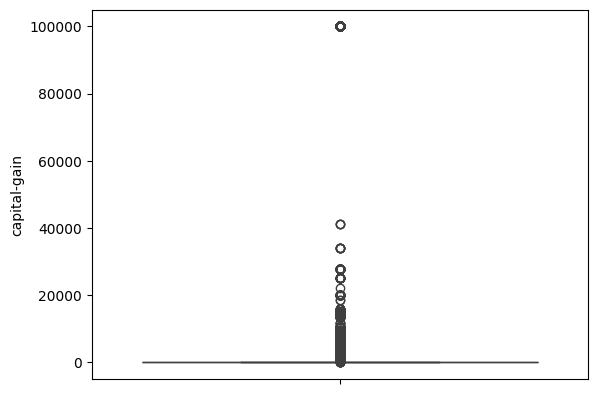

In [ ]:
sns.boxplot(df["capital-gain"])

In [ ]:
# Convert the outlier value to null value

df["capital-gain"]=df["capital-gain"].replace(99999, np.nan)


# EDA Visualization

In [ ]:
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [ ]:
def plot_categorical_vs_target(df, x, y='age',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

<ipython-input-13-e54f682687ab>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


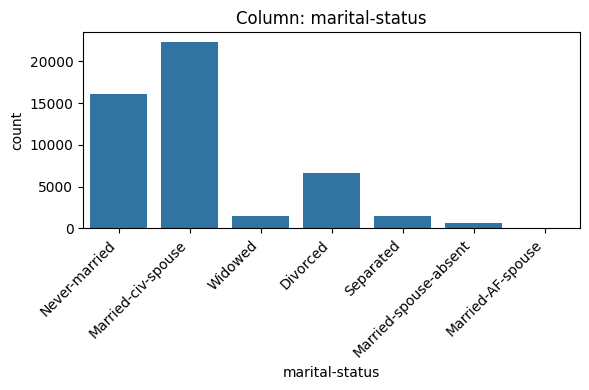

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 22366 times (45.84%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: marital-status'}, xlabel='marital-status', ylabel='count'>)

In [ ]:
explore_categorical(df, "marital-status")

<ipython-input-14-4abc3d2ef061>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'income vs. age'}, xlabel='income', ylabel='age'>)

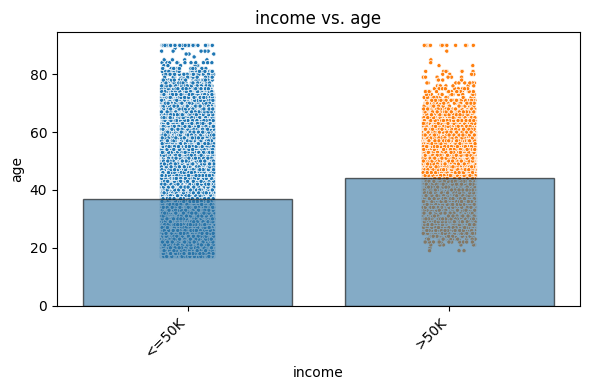

In [ ]:
plot_categorical_vs_target(df, x="income")

# Prepare data for modeling

In [ ]:
# Split the data

y=df["income"]
X=df.drop(columns="income")

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

## Create the preprocessor

In [ ]:
# Numeric features

num_cols=X_train.select_dtypes("number").columns
impute_median=SimpleImputer(strategy="median")
num_scaler=StandardScaler()
num_pipe=make_pipeline(impute_median, num_scaler)
num_tuple=("numerical", num_pipe, num_cols)
num_tuple

('numerical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'))

In [ ]:
# Nominal features

ohe_cols=X_train.select_dtypes("object").columns
impute_mode=SimpleImputer(strategy="most_frequent")
ohe_encoder=OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_pipe=make_pipeline(impute_mode, ohe_encoder)
ohe_tuple=("nominal", ohe_pipe, ohe_cols)
ohe_tuple


('nominal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'gender', 'native-country'],
       dtype='object'))

In [ ]:
# Instantiate the preprocessor

preprocessor=ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)

# Modeling

## RandomForests model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_default=RandomForestClassifier(random_state=42)
rf_default_pipe=make_pipeline(preprocessor, rf_default)

# Fit the model on training data
rf_default_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     27841
        >50K       1.00      1.00      1.00      8751

    accuracy                           1.00     36592
   macro avg       1.00      1.00      1.00     36592
weighted avg       1.00      1.00      1.00     36592



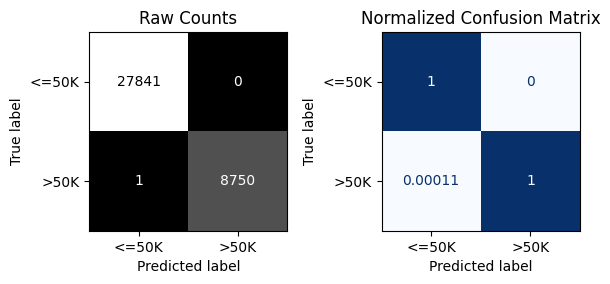


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      9268
        >50K       0.74      0.61      0.67      2930

    accuracy                           0.86     12198
   macro avg       0.81      0.77      0.79     12198
weighted avg       0.85      0.86      0.85     12198



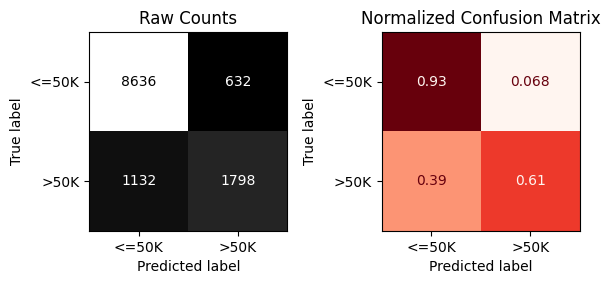

In [ ]:
evaluate_classification(rf_default_pipe, X_train, y_train, X_test, y_test)

### Evaluation

**Disclamer 1:** this dataset is considered unbalanced data due to the significant difference between categories in the target (income). So, I will evaluate the model depending on f1-score value depending on the harmonic mean between Recall and Precision.

**Disclamer 2:** this model has a significant overfitting and learned too much details, especially in the >50k class.


*   Firstly, 61% of predicited data were true and they paid more than 50k.
*   Secondly, 93% of predicted data were true and they paid less than or equal 50k.


*   f1-score has a relativeky high value in the <=50k class which represents good predictions. On the other side, the >50k class has low f1-score. So, predicitons in this class are not reliable.






## Permutation importance

In [ ]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(rf_default_pipe, X_test, y_test,n_repeats =5, random_state = SEED)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [ ]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

,permutation importance
capital-gain,3.820298e-02
marital-status,1.751107e-02
occupation,1.526480e-02
age,1.442859e-02
relationship,1.273979e-02
capital-loss,9.394983e-03
educational-num,8.460403e-03
hours-per-week,7.181505e-03
workclass,4.279390e-03
fnlwgt,3.164453e-03


In [ ]:
# Obtain feature importances from the fit model
rf_default.feature_importances_

array([1.54038437e-01, 1.72827972e-01, 6.37513352e-02, 8.62764236e-02,
       3.08982533e-02, 8.44944030e-02, 4.72504244e-03, 5.56234516e-03,
       7.21781740e-06, 1.04432377e-02, 5.93289393e-03, 8.08387319e-03,
       4.41218863e-03, 7.27621802e-05, 1.58674225e-03, 1.76207182e-03,
       6.67931143e-04, 2.73512855e-04, 6.63634837e-04, 2.09282092e-03,
       1.11465013e-03, 2.27635850e-03, 2.39025353e-03, 1.49087418e-02,
       3.83722274e-03, 7.55185345e-03, 8.16651062e-03, 4.72848713e-05,
       6.88163841e-03, 5.10128124e-03, 5.33064860e-03, 3.57005361e-04,
       5.92809428e-02, 9.03887889e-04, 2.45663357e-02, 1.63650090e-03,
       1.62759191e-03, 5.38897546e-03, 7.49168527e-05, 6.56462407e-03,
       1.73963436e-02, 4.30184507e-03, 3.09634501e-03, 3.45283780e-03,
       6.43767803e-03, 1.46465553e-04, 1.06389182e-02, 2.81879311e-03,
       6.96327261e-03, 4.37761887e-03, 4.46254804e-03, 5.11187894e-02,
       1.07976201e-02, 1.52714791e-03, 8.44174282e-03, 4.32943988e-03,
      

In [ ]:
# Saving the feature importances
importances = pd.Series(rf_default.feature_importances_,index=preprocessor.get_feature_names_out(),
                       name='Feature Importance')
importances

,Feature Importance
age,0.154038
fnlwgt,0.172828
educational-num,0.063751
capital-gain,0.086276
capital-loss,0.030898
...,...
native-country_Thailand,0.000061
native-country_Trinadad&Tobago,0.000082
native-country_United-States,0.005402
native-country_Vietnam,0.000308


In [ ]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6),
                          color_dict=None):

    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)

    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)

    # set titles and axis labels
    ax.set(xlabel='Importance',
           ylabel='Feature Names',
           title=title)

    ## return ax in case want to continue to update/modify figure
    return ax

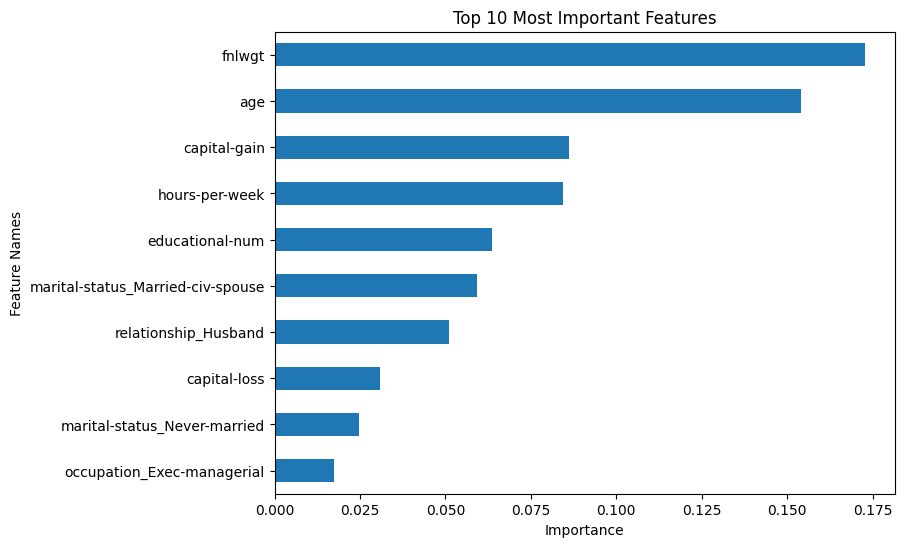

In [ ]:
plot_importance_color(importances, color_dict=None,top_n=10);

## Explanotary visualization for most important features

Text(0.5, 1.0, 'income Vs. capital-gain')

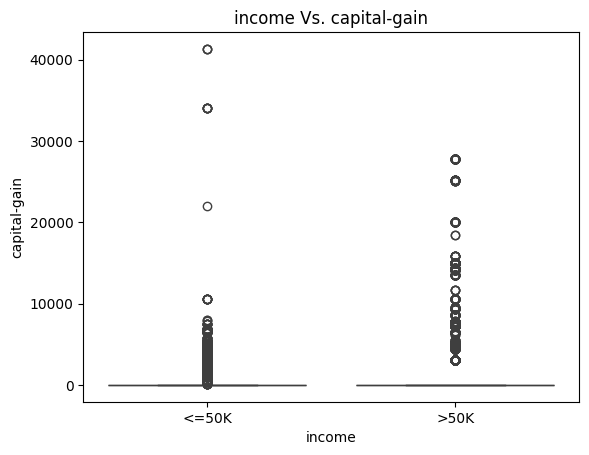

In [ ]:
# income Vs. capital-gain

ax=sns.boxplot(df, x="income", y="capital-gain")
ax.set_title("income Vs. capital-gain")

Depending on the above boxplot, it is clear that majority of data has a capital gain of zero due to the absence of quartile box. So, the presence of outliers in this chart represents all individuals who have a capital gain with value of more than zero.

Moreover, individuals with higher income (>50k) have a gradual increase in capital gain. On the other hand, individuals with lower income (<=50k) have a dense and slow increase in capital gain with 3 extreme values.

Text(0.5, 1.0, 'income Vs. hours-per-week')

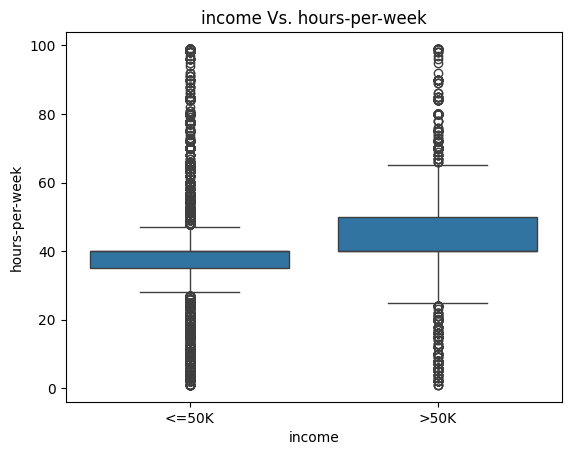

In [ ]:
# income Vs. hours-per-week

ax=sns.boxplot(df, x="income", y="hours-per-week")
ax.set_title("income Vs. hours-per-week")

Depending on the income Vs. total working hours per week chart, it is clear that 50% of individuals with higher income work around 50 hours/week. By contrast, 50% of people with lower income work 35 hours/week only.

However, there are many outliers and extreme values of total working hours per week for the target classes. So, we can not generlize the hypthesis of who "works more, paids more".